# Common Modules

In [2]:
# Common modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb

# Show the matplotlib plots inline
%matplotlib inline

# Part 1 : Agglomerative Clustering

## Toy Example

### Build from Scratch

Text(0.5, 1.0, 'Hierarchical clustering using complete linkage')

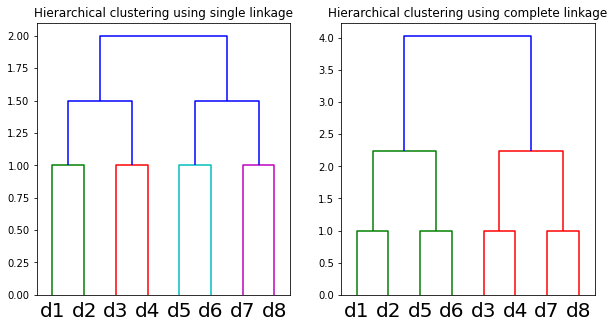

In [5]:
from scipy.cluster.hierarchy import dendrogram
from collections import namedtuple

def linkage(data, method):
  """
  Args:
    data (list[list[int,int]]:
      A list of 2D points.
    method (str):
      'single' or 'complete'

  Returns:
    A 2D array that describes the clustering process.
    Take single linkage as an example:

      array([[ 0. ,  1. ,  1. ,  2. ],
             [ 2. ,  3. ,  1. ,  2. ],
             [ 4. ,  5. ,  1. ,  2. ],
             [ 6. ,  7. ,  1. ,  2. ],
             [ 8. ,  9. ,  1.5,  4. ],
             [10. , 11. ,  1.5,  4. ],
             [12. , 13. ,  2. ,  8. ]])

    Note that your output may not be exactly same
    as above, since the merge order may be different
    depends on implementation. Just make sure your
    result is correct after you draw the dendrogram.
  """
  # Initial clusters
  Cluster = namedtuple("Cluster", "member,id")
  clusters = [Cluster([d],idx) for idx, d in enumerate(data)]

  mergings = []
  current_c_id = len(clusters)
  while len(clusters) != 1:
    # Distance matrix
    dist_matrix = np.zeros([len(clusters), len(clusters)])
    for i in range(len(clusters)):
      for j in range(len(clusters)):
        
        ########### [TODO 1.1] ###########
        dist_matrix[i][j] = cluster_euclidean_dist(clusters[i].member, clusters[j].member, method)
        ###############################

    # Find minimum distance and corresponding clusters
    min_dist = np.inf
    for i in range(len(clusters)):
      for j in range(len(clusters)):
        if i != j and dist_matrix[i][j] < min_dist:
          min_dist = dist_matrix[i][j]
          cluster_id_to_merge = [i,j]
    
    # Add new cluster
    cluster_1_to_be_merge = clusters[cluster_id_to_merge[0]]
    cluster_2_to_be_merge = clusters[cluster_id_to_merge[1]]
    new_cluster = Cluster(cluster_1_to_be_merge.member + cluster_2_to_be_merge.member, current_c_id)
    clusters.append(new_cluster)
    current_c_id += 1

    # Remove old cluster
    clusters.remove(cluster_1_to_be_merge)
    clusters.remove(cluster_2_to_be_merge)

    # Recode process
    mergings.append([cluster_1_to_be_merge.id, cluster_2_to_be_merge.id, min_dist, len(new_cluster.member)])

  return np.array(mergings)

########## [TODO 1.1] ##########
def cluster_euclidean_dist(c1, c2, method):
  """
  Args:
    c1 (list[list[int,int]]):
      A cluster, which is a list of 2D points.
    c2 (list[list[int,int]]):
      A cluster, which is a list of 2D points.
    method (str):
      'single' or 'complete'
  """
  dist = []
  for i in c1:
    for j in c2:
      dist.append((pow(i[0] - j[0], 2) + pow(i[1] - j[1], 2))**0.5)
  if method == 'single':
    return min(dist)
  elif method == 'complete':
    return max(dist)
##########################


data = [[3,1],[3,2],[3,3.5],[3,4.5],[1,1],[1,2],[1,3.5],[1,4.5]]
labels = ['d1','d2','d3','d4','d5','d6','d7','d8']
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

mergings_single = linkage(data, 'single')
dendrogram_ = dendrogram(mergings_single, orientation='top',
               labels=labels,
               leaf_font_size=20,
               ax=ax1
)
ax1.set_title("Hierarchical clustering using single linkage")

mergings_complete = linkage(data, 'complete')
dendrogram_ = dendrogram(mergings_complete, orientation='top',
               labels=labels,
               leaf_font_size=20,
               ax=ax2
)
ax2.set_title("Hierarchical clustering using complete linkage")

### Use Library

Text(0.5, 1.0, 'Hierarchical clustering using complete linkage')

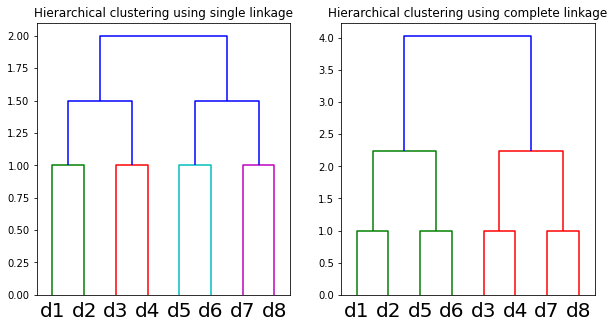

In [6]:
from scipy.cluster.hierarchy import linkage, dendrogram

data = np.array([[3,1],[3,2],[3,3.5],[3,4.5],[1,1],[1,2],[1,3.5],[1,4.5]])
labels = ['d1','d2','d3','d4','d5','d6','d7','d8']

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

mergings_single = linkage(data, method='single')
dendrogram_ = dendrogram(mergings_single, orientation='top',
               labels=labels,
               leaf_font_size=20,
               ax=ax1
)

ax1.set_title("Hierarchical clustering using single linkage")

mergings_complete = linkage(data, method='complete')
dendrogram_ = dendrogram(mergings_complete, orientation='top',
               labels=labels,
               leaf_font_size=20,
               ax=ax2
)
ax2.set_title("Hierarchical clustering using complete linkage")

## Cluter News Data

### Data Preparation

,text,target,title
9238,\nI am sure that Mike is correct on this point...,11,sci.crypt
3604,"Hi,\n\nI have the following software forsale:\...",6,misc.forsale
5414,"Reposting and summarizing, for your informatio...",2,comp.os.ms-windows.misc
1307,\n\nBecause that would contradict your religio...,19,talk.religion.misc
6614,"Can't guarantee that it'll work for everyone, ...",2,comp.os.ms-windows.misc


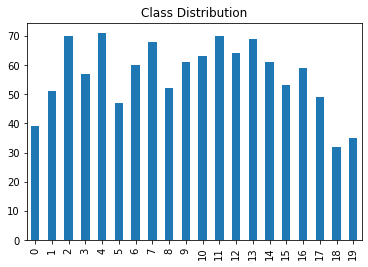

In [3]:
from sklearn.datasets import fetch_20newsgroups
# NOTE: you only need to run this block just once in the same runtime.
def twenty_newsgroups_to_df():
    """ Loads 20 newsgroups dataset in pandas DataFrame.

    Returns:
      df (pandas.DataFrame): A dataframe contain 'text', 'target', 'title'
    """
    data_bunch = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
    df = pd.DataFrame([data_bunch.data, data_bunch.target.tolist()]).T
    df.columns = ['text', 'target']

    # Add correpoding target names
    target_names = pd.DataFrame(data_bunch.target_names)
    target_names.columns=['title']
    df = pd.merge(df, target_names, left_on='target', right_index=True)

    df = df.sample(frac=0.1, random_state=1)
    return df

df = twenty_newsgroups_to_df()
df.target.value_counts(sort=False).plot.bar(title="Class Distribution")
df.head(n=5)

### Document Embedding : TF-IDF

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Calculate the feature matrix with TF-IDF
texts = list(df.text)
vectorizer = TfidfVectorizer(min_df=20, max_df=0.4, max_features=20000, ngram_range=(1,1), stop_words='english')
feature_matrix = vectorizer.fit_transform(texts)
print(f"Shape of feature matrix : {feature_matrix.shape}")

Shape of feature matrix : (1131, 548)


### Cluster the News

Text(0.5, 0.98, 'Clustering news using AGNES linkage')

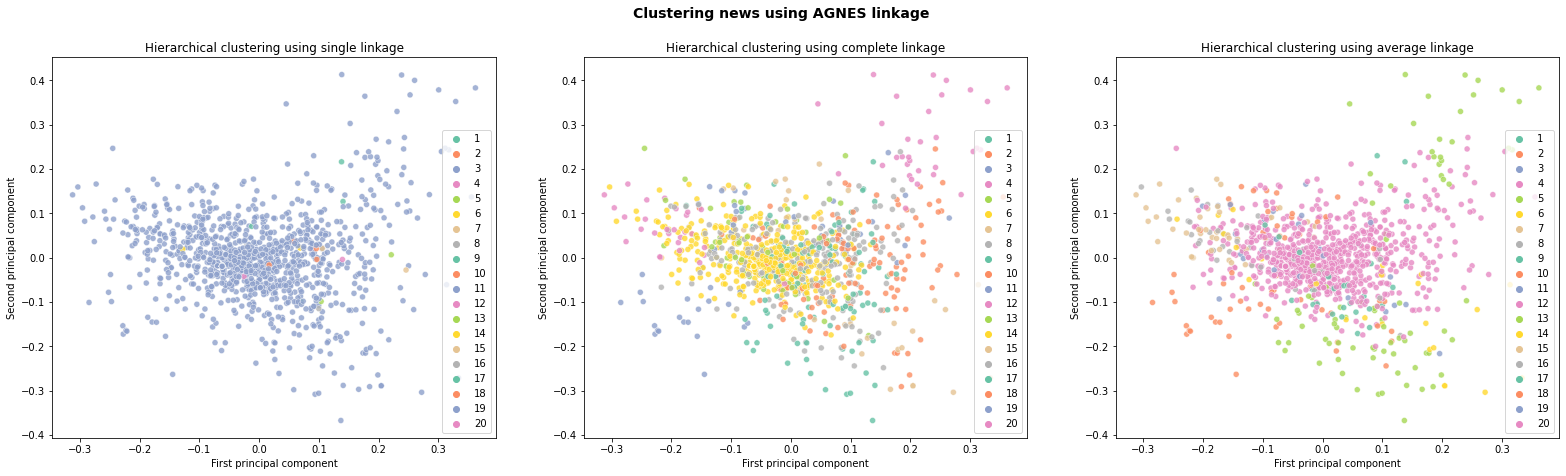

In [8]:
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

dist_matrix = 1 - cosine_similarity(feature_matrix)
mergings_single = linkage(dist_matrix, method='single')
mergings_complete = linkage(dist_matrix, method='complete')
mergings_average = linkage(dist_matrix, method='average')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(27, 7)
k = 20
pca = PCA()
components = pca.fit_transform(feature_matrix.todense())
xs, ys = components[:, 0], components[:, 1]

h_link_cluster_labels = fcluster(mergings_single, k, criterion='maxclust')
sns.scatterplot(x = xs, y=ys, hue=h_link_cluster_labels, palette="Set2",
                      alpha=0.8, legend="full", ax=ax1)
ax1.set_title("Hierarchical clustering using single linkage")
ax1.set_xlabel("First principal component")
ax1.set_ylabel("Second principal component")


h_link_cluster_labels = fcluster(mergings_complete, k, criterion='maxclust')
sns.scatterplot(x = xs, y=ys, hue=h_link_cluster_labels, palette="Set2",
                      alpha=0.8, legend="full", ax=ax2)
ax2.set_title("Hierarchical clustering using complete linkage")
ax2.set_xlabel("First principal component")
ax2.set_ylabel("Second principal component")

h_link_cluster_labels = fcluster(mergings_average, k, criterion='maxclust')
ax3 = sns.scatterplot(x = xs, y=ys, hue=h_link_cluster_labels, palette="Set2",
                      alpha=0.8, legend="full", ax=ax3)
ax3.set_title("Hierarchical clustering using average linkage")
ax3.set_xlabel("First principal component")
ax3.set_ylabel("Second principal component")

plt.suptitle("Clustering news using AGNES linkage", fontsize=14, fontweight='bold')

## Discussion [TODO 1.2]
Explain what your find...
用 single linkage 可能會因為某個 cluster 很大，涵蓋的範圍較廣，導致大的 cluster 變得更大。
用 complete linkage 則是會讓大的 cluster 不容易變得更大，因為是找最遠的。
average linkage 則是介於兩者之間。

# Part 2 : Constituency & Dependency Parse

## Install Library (Only need run once in a runtime)
It may take some time to download.

In [1]:
!pip install stanza -U
!pip install stanfordcorenlp
import os
import stanza
stanza.download('en') # download English model
corenlp_dir = './corenlp'
stanza.install_corenlp(dir=corenlp_dir)
os.environ["CORENLP_HOME"] = corenlp_dir # Set the CORENLP_HOME environment variable to point to the installation location
!ls $CORENLP_HOME

     |████████████████████████████████| 286kB 4.5MB/s 


2021-04-16 01:25:14 INFO: Downloading default packages for language: en (English)...
2021-04-16 01:26:39 INFO: Finished downloading models and saved to /root/stanza_resources.
2021-04-16 01:26:39 INFO: Installing CoreNLP package into ./corenlp...
2021-04-16 01:28:26 WARNING: For customized installation location, please set the `CORENLP_HOME` environment variable to the location of the installation. In Unix, this is done with `export CORENLP_HOME=./corenlp`.


build.xml				  jollyday.jar
corenlp.sh				  LIBRARY-LICENSES
CoreNLP-to-HTML.xsl			  LICENSE.txt
ejml-core-0.39.jar			  Makefile
ejml-core-0.39-sources.jar		  patterns
ejml-ddense-0.39.jar			  pom-java-11.xml
ejml-ddense-0.39-sources.jar		  pom.xml
ejml-simple-0.39.jar			  protobuf.jar
ejml-simple-0.39-sources.jar		  README.txt
input.txt				  RESOURCE-LICENSES
input.txt.out				  SemgrexDemo.java
input.txt.xml				  ShiftReduceDemo.java
javax.activation-api-1.2.0.jar		  slf4j-api.jar
javax.activation-api-1.2.0-sources.jar	  slf4j-simple.jar
javax.json-api-1.0-sources.jar		  stanford-corenlp-4.2.0.jar
javax.json.jar				  stanford-corenlp-4.2.0-javadoc.jar
jaxb-api-2.4.0-b180830.0359.jar		  stanford-corenlp-4.2.0-models.jar
jaxb-api-2.4.0-b180830.0359-sources.jar   stanford-corenlp-4.2.0-sources.jar
jaxb-core-2.3.0.1.jar			  StanfordCoreNlpDemo.java
jaxb-core-2.3.0.1-sources.jar		  StanfordDependenciesManual.pdf
jaxb-impl-2.4.0-b180830.0438.jar	  sutime
jaxb-impl-2.4.0-b180830.0438-sources

## Constituency Parse: Extract Noun / Verb Phrases

In [9]:
import os
from stanza.server import CoreNLPClient
from google.protobuf.json_format import MessageToDict # Convert parse result to dictionary
from pprint import pprint # Print dictionary nicely
import pdb

with CoreNLPClient(annotators=['tokenize','ssplit','pos','lemma','ner', 'parse', 'depparse','coref'], 
                   memory='4G', endpoint='http://localhost:9001', be_quiet=True) as client:

  # Make annotaions according to provided annotators
  comment = "The battery and resolution are good, but the appearance is not good."
  nlp = client.annotate(comment)
  sentence = nlp.sentence[0] # We only have one setence here

  # Get the constituency parse result
  constituency_parse = sentence.parseTree
  result = MessageToDict(constituency_parse)
  pprint(result)

2021-04-16 02:46:24 INFO: Writing properties to tmp file: corenlp_server-47ea3a23cda246e5.props
2021-04-16 02:46:24 INFO: Starting server with command: java -Xmx4G -cp ./corenlp/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9001 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-47ea3a23cda246e5.props -annotators tokenize,ssplit,pos,lemma,ner,parse,depparse,coref -preload -outputFormat serialized


{'child': [{'child': [{'child': [{'child': [{'child': [{'value': 'The'}],
                                             'score': -2.5811824798583984,
                                             'value': 'DT'},
                                            {'child': [{'value': 'battery'}],
                                             'score': -9.73575496673584,
                                             'value': 'NN'},
                                            {'child': [{'value': 'and'}],
                                             'score': -0.14651738107204437,
                                             'value': 'CC'},
                                            {'child': [{'value': 'resolution'}],
                                             'score': -8.065176963806152,
                                             'value': 'NN'}],
                                  'score': -28.763582229614258,
                                  'value': 'NP'},
                                 {'c

In [34]:
###### [TODO 2.1] #####
def extract_phrases(pattern, result):
  ret, ans = '', ''
  if 'child' in result:
    for c in result['child']:
      r, a = extract_phrases(pattern, c)
      ret += r
      ans += a
  else:
    return result['value'] + ' ', ''
  if result['value'] == pattern:
    ans += ret
  return ret, ans
  
    
###########################

print(extract_phrases("NP", result)[1])
print(extract_phrases("VP", result)[1])

The battery and resolution the appearance 
are good is not good 


## Dependency Parse : Extract Consumer Opinions

In [51]:
import stanza
comment_1 = "The battery and resolution are good, but the appearance is not good."
comment_2 = "I think the battery is not bad. Unexpectedly, the camera and resolution is the best in the market."
comment_3 = "The appearance is unpleasant, and I hope it can be modified in next version!"
nlp = stanza.Pipeline(lang='en', processors='tokenize,pos,lemma,depparse', logging_level='WARN')

def extract_opinions(comment: str):
  # doc -> stanza.models.common.doc.Document
  # doc.sentences -> list[sent]
  #   sent -> stanza.models.common.doc.Sentence
  #   sent.words -> list[word]
  #     word -> stanza.models.common.doc.Word
  #
  # Your can access different value in word object:
  #   {
  #     "id": 1,
  #     "text": "The",
  #     "lemma": "the",
  #     "upos": "DET",
  #     "xpos": "DT",
  #     "feats": "Definite=Def|PronType=Art",
  #     "head": 2,
  #     "deprel": "det",
  #     "misc": "start_char=0|end_char=3"
  #   }
  # For example: word.id is 1
  # You can find different deprel type in : https://downloads.cs.stanford.edu/nlp/software/dependencies_manual.pdf

  doc = nlp(comment)
  sents = doc.sentences

  result = {}
  for sent in sents:
    for word in sent.words:
      if word.deprel == 'nsubj' and word.xpos=='NN':
        head_word = sent.words[word.head-1]
      ########## [TODO 2.2] ###########
        if sent.words[word.head-2].deprel == 'advmod':
            result[(word.text, word.id)] = (sent.words[word.head-2].text + ' ' + head_word.text, head_word.id - 1)
        else:
          result[(word.text, word.id)] = (head_word.text, head_word.id)
      elif word.deprel == 'conj' and word.xpos == 'NN':
        head_word = sent.words[sent.words[word.head - 1].head - 1]
        result[(word.text, word.id)] = (head_word.text, head_word.id)
      ###########################

  print('********************')
  for k, v in result.items():
    print(f'Attribute: {k[0]}   Comment: {v[0]}')


# You can observe the parse results with following codes
# But do not show these information in submission file
'''
doc = nlp(comment_1)
print(*[f'id: {word.id}\tword: {word.text}\thead id: {word.head}\thead: {sent.words[word.head-1].text if word.head > 0 else "root"}\tdeprel: {word.deprel}' for sent in doc.sentences for word in sent.words], sep='\n')
doc = nlp(comment_2)
print(*[f'id: {word.id}\tword: {word.text}\thead id: {word.head}\thead: {sent.words[word.head-1].text if word.head > 0 else "root"}\tdeprel: {word.deprel}' for sent in doc.sentences for word in sent.words], sep='\n')
doc = nlp(comment_3)
print(*[f'id: {word.id}\tword: {word.text}\thead id: {word.head}\thead: {sent.words[word.head-1].text if word.head > 0 else "root"}\tdeprel: {word.deprel}' for sent in doc.sentences for word in sent.words], sep='\n')
'''

extract_opinions(comment_1)
extract_opinions(comment_2)
extract_opinions(comment_3)

********************
Attribute: battery   Comment: good
Attribute: resolution   Comment: good
Attribute: appearance   Comment: not good
********************
Attribute: battery   Comment: not bad
Attribute: camera   Comment: best
Attribute: resolution   Comment: best
********************
Attribute: appearance   Comment: unpleasant
